<a href="https://colab.research.google.com/github/peksikeksi/fandango-reviews-data-analysis/blob/master/fandango_reviews_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Import Datasets

In [ ]:
all_sites_dataset = pd.read_csv('/content/all_sites_scores.csv')
fandango_dataset = pd.read_csv('/content/fandango_scrape.csv')

### Explore Datasets

In [ ]:
all_sites_dataset.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560


In [ ]:
all_sites_dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
RottenTomatoes,146.0,60.849315,30.168799,5.0,31.25,63.50,89.00,100.0
RottenTomatoes_User,146.0,63.876712,20.024430,20.0,50.00,66.50,81.00,94.0
Metacritic,146.0,58.808219,19.517389,13.0,43.50,59.00,75.00,94.0
Metacritic_User,146.0,6.519178,1.510712,2.4,5.70,6.85,7.50,9.6
IMDB,146.0,6.736986,0.958736,4.0,6.30,6.90,7.40,8.6
Metacritic_user_vote_count,146.0,185.705479,316.606515,4.0,33.25,72.50,168.50,2375.0
IMDB_user_vote_count,146.0,42846.205479,67406.509171,243.0,5627.00,19103.00,45185.75,334164.0


In [ ]:
all_sites_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        146 non-null    object 
 1   RottenTomatoes              146 non-null    int64  
 2   RottenTomatoes_User         146 non-null    int64  
 3   Metacritic                  146 non-null    int64  
 4   Metacritic_User             146 non-null    float64
 5   IMDB                        146 non-null    float64
 6   Metacritic_user_vote_count  146 non-null    int64  
 7   IMDB_user_vote_count        146 non-null    int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 9.2+ KB


#### Rotten Tomatoes

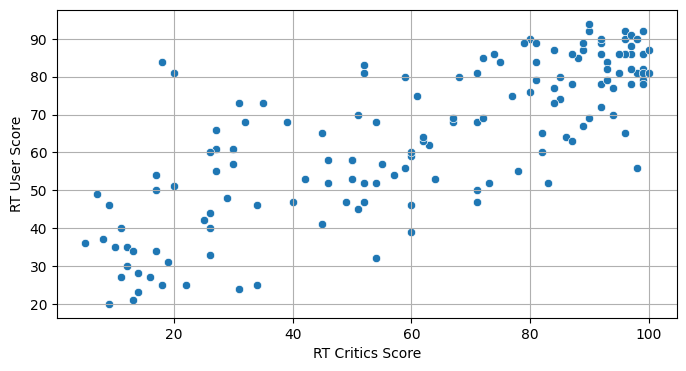

In [ ]:
plt.figure(figsize=(8,4))
sns.scatterplot(data=all_sites_dataset, x='RottenTomatoes', y='RottenTomatoes_User')
plt.xlabel('RT Critics Score')
plt.ylabel('RT User Score')
plt.grid(True);

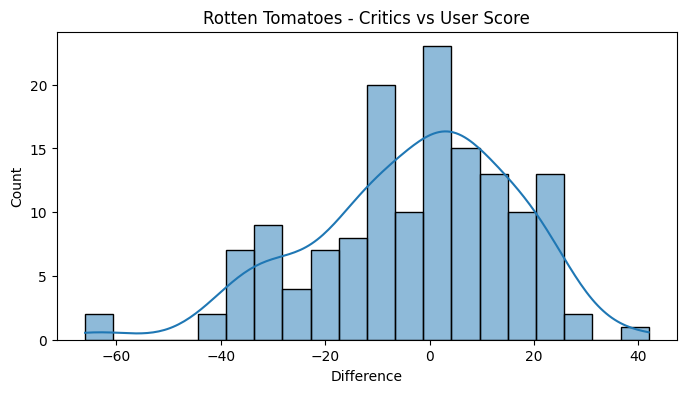

In [ ]:
# Calculate the difference between critic scores and user scores
all_sites_dataset['RT_Diff'] = all_sites_dataset['RottenTomatoes'] - all_sites_dataset['RottenTomatoes_User']

plt.figure(figsize=(8,4))
sns.histplot(data=all_sites_dataset, x='RT_Diff', kde=True, bins=20)
plt.title('Rotten Tomatoes - Critics vs User Score')
plt.xlabel('Difference');

In [ ]:
# Absolute Mean
all_sites_dataset['RT_Diff'].apply(abs).mean()

15.095890410958905

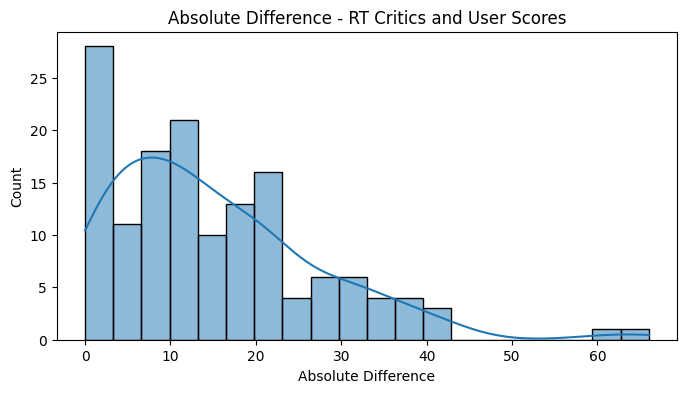

In [ ]:
plt.figure(figsize=(8,4))
sns.histplot(x=all_sites_dataset['RT_Diff'].apply(abs), kde=True, bins=20)
plt.title('Absolute Difference - RT Critics and User Scores')
plt.xlabel('Absolute Difference');

#### MetaCritic

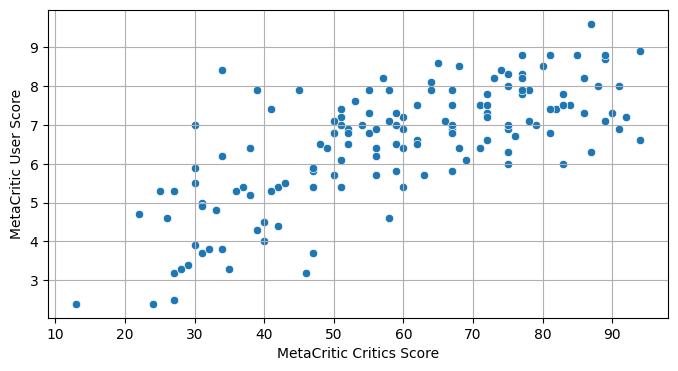

In [ ]:
plt.figure(figsize=(8,4))
sns.scatterplot(data=all_sites_dataset, x='Metacritic', y='Metacritic_User')
plt.xlabel('MetaCritic Critics Score')
plt.ylabel('MetaCritic User Score')
plt.grid(True);

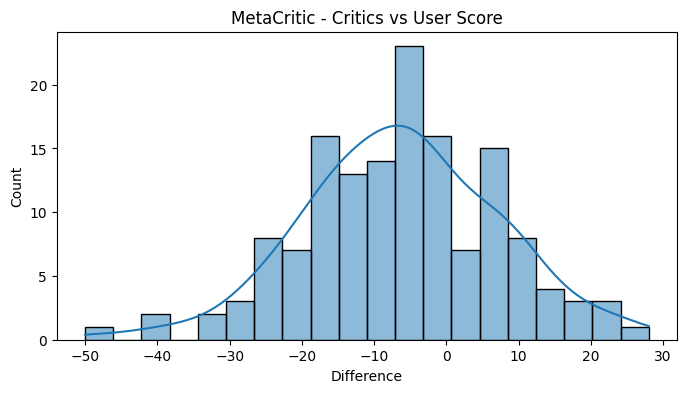

In [ ]:
# Calculate the difference between critic scores and user scores
all_sites_dataset['Metacritic_Diff'] = all_sites_dataset['Metacritic'] - all_sites_dataset['Metacritic_User']*10

plt.figure(figsize=(8,4))
sns.histplot(data=all_sites_dataset, x='Metacritic_Diff', kde=True, bins=20)
plt.title('MetaCritic - Critics vs User Score')
plt.xlabel('Difference');

In [ ]:
# Absolute Mean
all_sites_dataset['Metacritic_Diff'].apply(abs).mean()

11.917808219178083

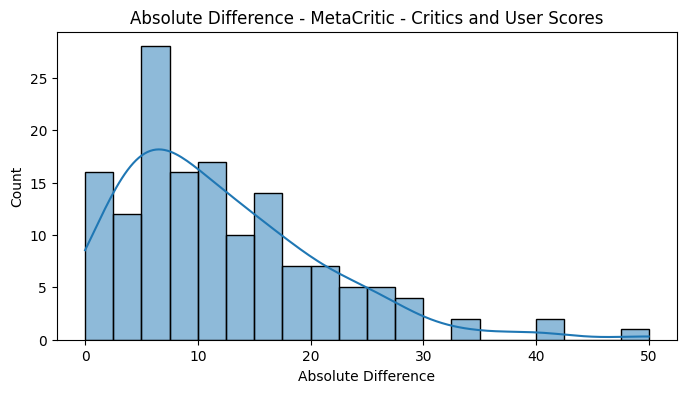

In [ ]:
plt.figure(figsize=(8,4))
sns.histplot(x=all_sites_dataset['Metacritic_Diff'].apply(abs), kde=True, bins=20)
plt.title('Absolute Difference - MetaCritic - Critics and User Scores')
plt.xlabel('Absolute Difference');

#### IMBD vs MetaCritic

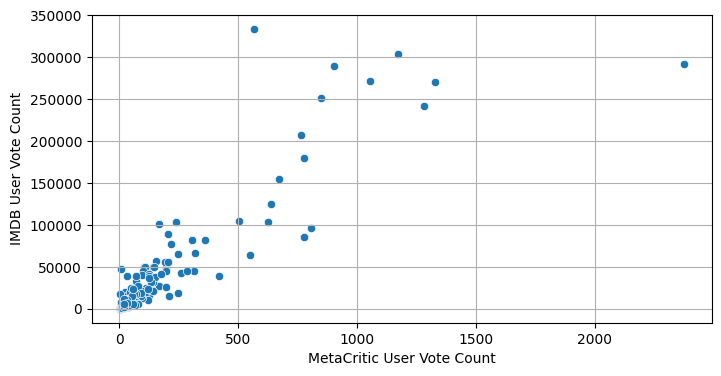

In [ ]:
plt.figure(figsize=(8,4))
sns.scatterplot(data=all_sites_dataset, x='Metacritic_user_vote_count', y='IMDB_user_vote_count')
plt.grid(True)
plt.xlabel('MetaCritic User Vote Count')
plt.ylabel('IMDB User Vote Count');

#### Fandango

In [ ]:
fandango_dataset.head()

,FILM,STARS,RATING,VOTES
0,Fifty Shades of Grey (2015),4.0,3.9,34846
1,Jurassic World (2015),4.5,4.5,34390
2,American Sniper (2015),5.0,4.8,34085
3,Furious 7 (2015),5.0,4.8,33538
4,Inside Out (2015),4.5,4.5,15749


In [ ]:
fandango_dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
STARS,504.0,3.558532,1.563133,0.0,3.5,4.0,4.50,5.0
RATING,504.0,3.375794,1.491223,0.0,3.1,3.8,4.30,5.0
VOTES,504.0,1147.863095,3830.583136,0.0,3.0,18.5,189.75,34846.0


In [ ]:
fandango_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   FILM    504 non-null    object 
 1   STARS   504 non-null    float64
 2   RATING  504 non-null    float64
 3   VOTES   504 non-null    int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 15.9+ KB


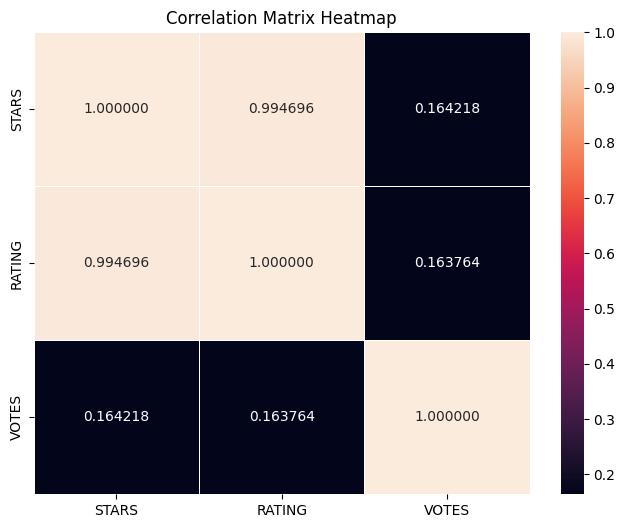

In [ ]:
corr_matrix = fandango_dataset.corr(numeric_only=True)

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, fmt='.6f', linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show();

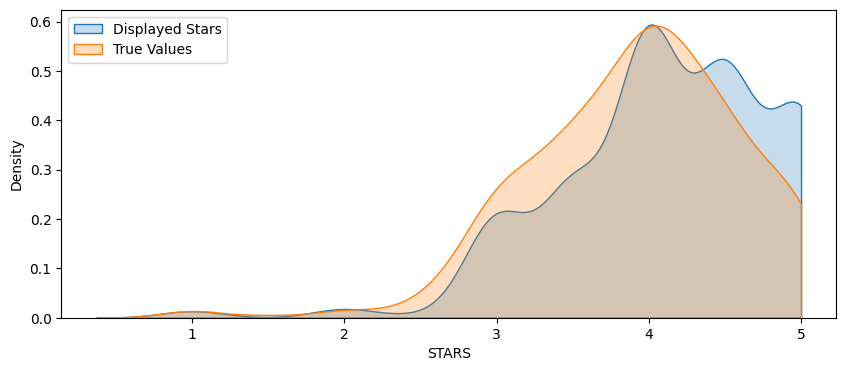

In [ ]:
user_reviewed = fandango_dataset[fandango_dataset['VOTES']>0]

plt.figure(figsize=(10,4))
sns.kdeplot(data=user_reviewed, x='STARS', fill=True, label='Displayed Stars', clip=[0,5])
sns.kdeplot(data=user_reviewed, x='RATING', fill=True, label='True Values', clip=[0,5])
plt.legend(loc='upper left');

In [ ]:
user_reviewed.loc[:, 'RATING_DIFF'] = (user_reviewed['STARS'] - user_reviewed['RATING']).round(2)
user_reviewed.head()

,FILM,STARS,RATING,VOTES,RATING_DIFF
0,Fifty Shades of Grey (2015),4.0,3.9,34846,0.1
1,Jurassic World (2015),4.5,4.5,34390,0.0
2,American Sniper (2015),5.0,4.8,34085,0.2
3,Furious 7 (2015),5.0,4.8,33538,0.2
4,Inside Out (2015),4.5,4.5,15749,0.0


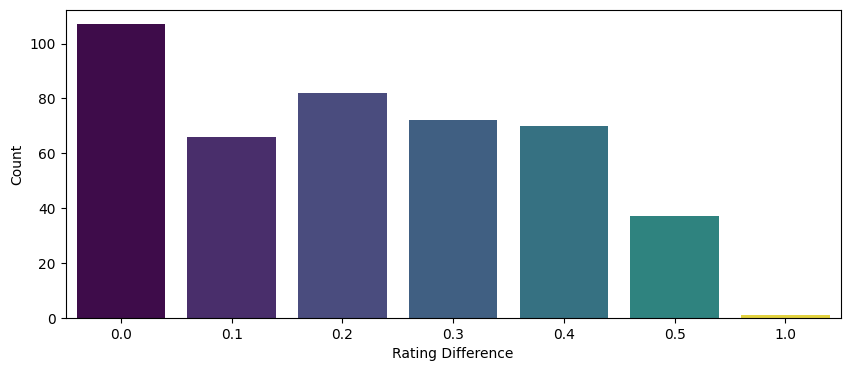

In [ ]:
# Count the number of times there is a difference in scoring
plt.figure(figsize=(10,4))
sns.countplot(data=user_reviewed, x='RATING_DIFF', palette='viridis', hue='RATING_DIFF', legend=False)
plt.ylabel('Count')
plt.xlabel('Rating Difference');

### Comparing All Sites

In [ ]:
merged_dataset = pd.merge(all_sites_dataset, fandango_dataset, on='FILM', how='inner')
merged_dataset.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,RT_Diff,Metacritic_Diff,STARS,RATING,VOTES
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107,-12,-5.0,5.0,4.5,14846
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709,5,-8.0,5.0,4.5,12640
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660,-10,-17.0,5.0,4.5,12055
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136,-66,-25.0,5.0,4.5,1793
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560,-14,-5.0,3.5,3.0,1021


In [ ]:
merged_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        145 non-null    object 
 1   RottenTomatoes              145 non-null    int64  
 2   RottenTomatoes_User         145 non-null    int64  
 3   Metacritic                  145 non-null    int64  
 4   Metacritic_User             145 non-null    float64
 5   IMDB                        145 non-null    float64
 6   Metacritic_user_vote_count  145 non-null    int64  
 7   IMDB_user_vote_count        145 non-null    int64  
 8   RT_Diff                     145 non-null    int64  
 9   Metacritic_Diff             145 non-null    float64
 10  STARS                       145 non-null    float64
 11  RATING                      145 non-null    float64
 12  VOTES                       145 non-null    int64  
dtypes: float64(5), int64(7), object(1)


In [ ]:
merged_dataset.rename(columns={'STARS': 'Fandango_Stars', 'RATING': 'Fandango_Rating', 'VOTES': 'Fandango_Votes'}, inplace=True)

In [ ]:
merged_dataset.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,RT_Diff,Metacritic_Diff,Fandango_Stars,Fandango_Rating,Fandango_Votes
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107,-12,-5.0,5.0,4.5,14846
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709,5,-8.0,5.0,4.5,12640
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660,-10,-17.0,5.0,4.5,12055
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136,-66,-25.0,5.0,4.5,1793
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560,-14,-5.0,3.5,3.0,1021


In [ ]:
# Scale all ratings between the values of 0-100
merged_dataset.loc[:, 'Metacritic_User_Scaled'] = merged_dataset['Metacritic_User']*10

merged_dataset.loc[:, 'IMDB_Scaled'] = merged_dataset['IMDB']*10

merged_dataset.loc[:, 'Fandango_Stars_Scaled'] = merged_dataset['Fandango_Stars']*20
merged_dataset.loc[:, 'Fandango_Rating_Scaled'] = merged_dataset['Fandango_Rating']*20

scores_only = merged_dataset[['Fandango_Rating_Scaled', 'Fandango_Stars_Scaled', 'RottenTomatoes', 'RottenTomatoes_User', 'Metacritic', 'Metacritic_User_Scaled', 'IMDB_Scaled']]

In [ ]:
scores_only.head()

,Fandango_Rating_Scaled,Fandango_Stars_Scaled,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User_Scaled,IMDB_Scaled
0,90.0,100.0,74,86,66,71.0,78.0
1,90.0,100.0,85,80,67,75.0,71.0
2,90.0,100.0,80,90,64,81.0,78.0
3,90.0,100.0,18,84,22,47.0,54.0
4,60.0,70.0,14,28,29,34.0,51.0


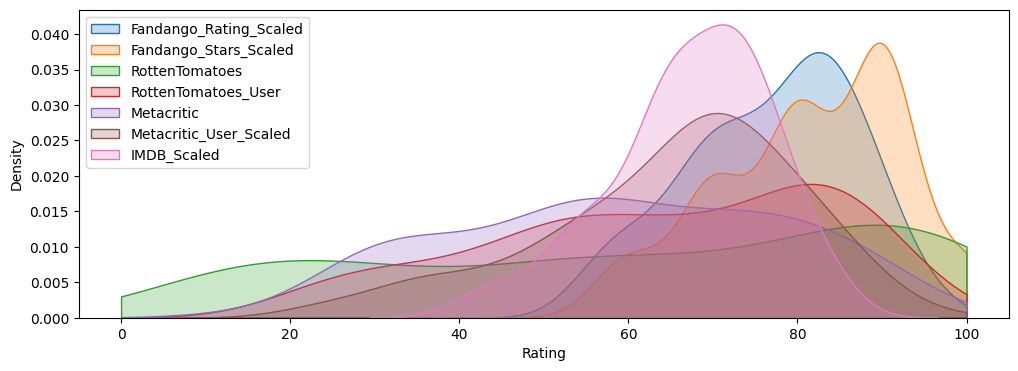

In [ ]:
plt.figure(figsize=(12, 4))

# Plot kernel density for each column of interest and add labels
for column in scores_only.columns:
    sns.kdeplot(data=scores_only[column], fill=True, clip=[0, 100], label=column)

plt.legend(loc='upper left')
plt.xlabel('Rating')
plt.show()

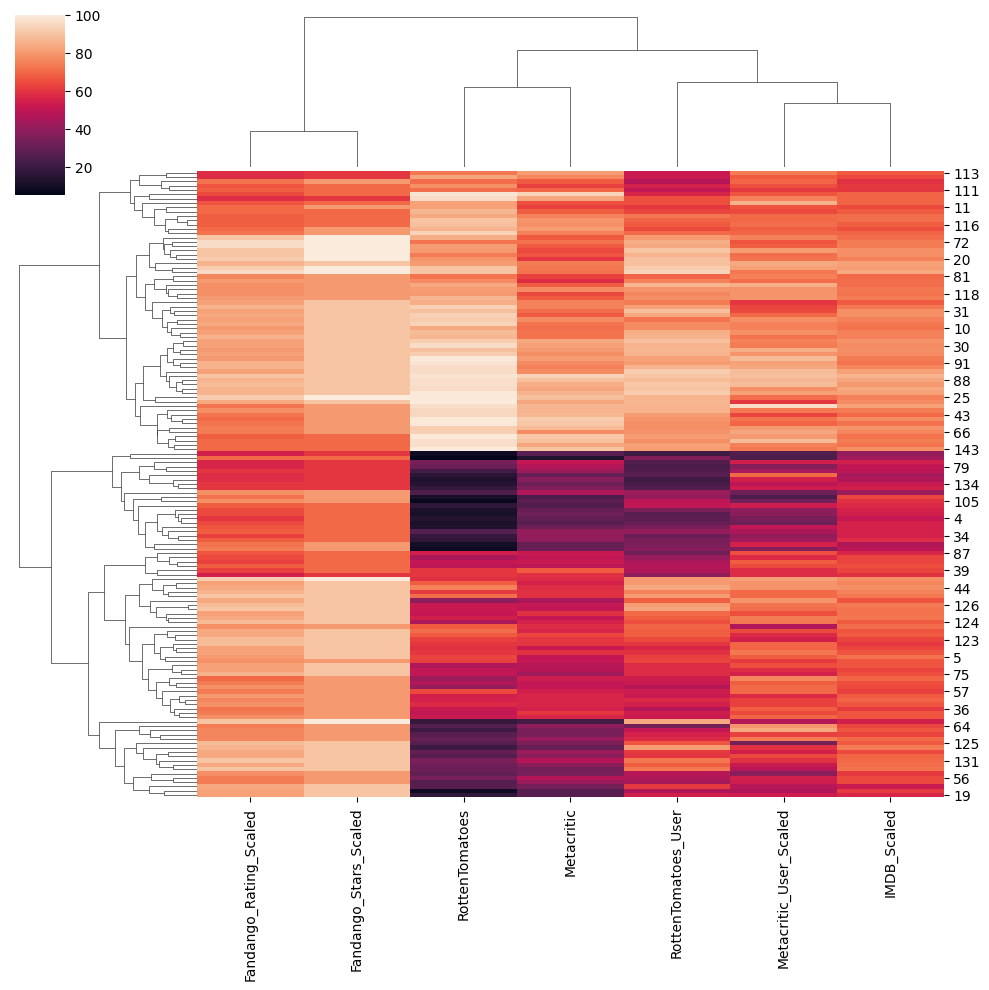

In [ ]:
sns.clustermap(scores_only)